In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
%pwd

'/Users/adrianapsay/dsc106/project2'

In [136]:
dexcom_001 = pd.read_csv('/Users/adrianapsay/dsc106/project2/Dexcom_001.csv')
dexcom_001.head(20)

,Index,Timestamp (YYYY-MM-DDThh:mm:ss),Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer)
0,1,NaN,FirstName,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,LastName,NaN,001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,PatientIdentifier,NaN,2019-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,DateOfBirth,NaN,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,Device,NaN,NaN,Dexcom G6 Mobile App,iPhone G6,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,Alert,Fall,NaN,NaN,iPhone G6,NaN,NaN,NaN,NaN,3.0,NaN
6,7,NaN,Alert,High,NaN,NaN,iPhone G6,200.0,NaN,NaN,NaN,NaN,NaN
7,8,NaN,Alert,Low,NaN,NaN,iPhone G6,80.0,NaN,NaN,NaN,NaN,NaN
8,9,NaN,Alert,Signal Loss,NaN,NaN,iPhone G6,NaN,NaN,NaN,00:20:00,NaN,NaN
9,10,NaN,Alert,Rise,NaN,NaN,iPhone G6,NaN,NaN,NaN,NaN,3.0,NaN


In [137]:
dexcom_001.rename(columns={'Timestamp (YYYY-MM-DDThh:mm:ss)':'Date and Time'}, inplace=True)

In [138]:
dexcom_001 = dexcom_001[12:].reset_index()
dexcom_001.drop(columns=['index', 'Index'], inplace=True)

In [139]:
dexcom_001

,Date and Time,Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer)
0,2020-02-13 17:23:32,EGV,NaN,NaN,NaN,iPhone G6,61.0,NaN,NaN,NaN,NaN,11101.0
1,2020-02-13 17:28:32,EGV,NaN,NaN,NaN,iPhone G6,59.0,NaN,NaN,NaN,NaN,11401.0
2,2020-02-13 17:33:32,EGV,NaN,NaN,NaN,iPhone G6,58.0,NaN,NaN,NaN,NaN,11701.0
3,2020-02-13 17:38:32,EGV,NaN,NaN,NaN,iPhone G6,59.0,NaN,NaN,NaN,NaN,12001.0
4,2020-02-13 17:43:31,EGV,NaN,NaN,NaN,iPhone G6,63.0,NaN,NaN,NaN,NaN,12301.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2556,2020-02-22 17:33:23,EGV,NaN,NaN,NaN,iPhone G6,139.0,NaN,NaN,NaN,NaN,789294.0
2557,2020-02-22 17:38:23,EGV,NaN,NaN,NaN,iPhone G6,141.0,NaN,NaN,NaN,NaN,789594.0
2558,2020-02-22 17:43:23,EGV,NaN,NaN,NaN,iPhone G6,143.0,NaN,NaN,NaN,NaN,789894.0
2559,2020-02-22 17:48:22,EGV,NaN,NaN,NaN,iPhone G6,139.0,NaN,NaN,NaN,NaN,790194.0


In [140]:
dexcom_001['Date'] = dexcom_001['Date and Time'].apply(lambda x: x.split(' ')[0])
dexcom_001['Time'] = dexcom_001['Date and Time'].apply(lambda x: x.split(' ')[1])
dexcom_001['Date'] = pd.to_datetime(dexcom_001['Date'])
dexcom_001['Time'] = pd.to_datetime(dexcom_001['Time'], format='%H:%M:%S').dt.time

In [141]:
dexcom_001['Time']

0       17:23:32
1       17:28:32
2       17:33:32
3       17:38:32
4       17:43:31
          ...   
2556    17:33:23
2557    17:38:23
2558    17:43:23
2559    17:48:22
2560    17:53:23
Name: Time, Length: 2561, dtype: object

In [142]:
dexcom_001.groupby(['Date', 'Time']).mean()

Glucose Value (mg/dL)  Insulin Value (u)  \
Date       Time                                                 
2020-02-13 17:23:32                   61.0                NaN   
           17:28:32                   59.0                NaN   
           17:33:32                   58.0                NaN   
           17:38:32                   59.0                NaN   
           17:43:31                   63.0                NaN   
...                                    ...                ...   
2020-02-22 17:33:23                  139.0                NaN   
           17:38:23                  141.0                NaN   
           17:43:23                  143.0                NaN   
           17:48:22                  139.0                NaN   
           17:53:23                  129.0                NaN   

                     Carb Value (grams)  Glucose Rate of Change (mg/dL/min)  \
Date       Time                                                               
2020-02-13 17:23:32                 NaN                                 NaN   
           17:28:32                 NaN                                 NaN   
           17:33:32                 NaN                                 NaN   
           17:38:32                 NaN                                 NaN   
           17:43:31                 NaN                                 NaN   
...                                 ...                                 ...   
2020-02-22 17:33:23                 NaN                                 NaN   
           17:38:23                 NaN                                 NaN   
           17:43:23                 NaN                                 NaN   
           17:48:22                 NaN                                 NaN   
           17:53:23                 NaN                                 NaN   

                     Transmitter Time (Long Integer)  
Date       Time                                       
2020-02-13 17:23:32                          11101.0  
           17:28:32                          11401.0  
           17:33:32                          11701.0  
           17:38:32                          12001.0  
           17:43:31                          12301.0  
...                                              ...  
2020-02-22 17:33:23                         789294.0  
           17:38:23                         789594.0  
           17:43:23                         789894.0  
           17:48:22                         790194.0  
           17:53:23                         790494.0  

[2561 rows x 5 columns]

In [143]:
foodlog_001 = pd.read_csv('/Users/adrianapsay/dsc106/project2/Food_Log_001.csv')

In [144]:
foodlog_001['date'] = pd.to_datetime(foodlog_001['date'])
foodlog_001

,date,time,time_begin,time_end,logged_food,amount,unit,searched_food,calorie,total_carb,dietary_fiber,sugar,protein,total_fat
0,2020-02-13,18:00:00,2020-02-13 18:00:00,NaN,Berry Smoothie,20.00,fluid ounce,Strawberry Smoothie,456.0,85.0,1.7,83.0,16.0,3.3
1,2020-02-13,20:30:00,2020-02-13 20:30:00,NaN,Chicken Leg,1.00,NaN,chicken leg,475.0,0.0,0.0,0.0,62.0,23.0
2,2020-02-13,20:30:00,2020-02-13 20:30:00,NaN,Asparagus,4.00,NaN,Asparagus,13.0,2.5,1.2,0.8,1.4,0.1
3,2020-02-14,07:10:00,2020-02-14 07:10:00,NaN,Natrel Lactose Free 2 Percent,8.00,fluid ounce,(Natrel) Lactose Free 2% Partly Skimmed Milk,120.0,9.0,NaN,8.0,12.0,NaN
4,2020-02-14,07:10:00,2020-02-14 07:10:00,NaN,Standard Breakfast,0.75,cup,"(Kellogg's) Frosted Flakes, Cereal",110.0,26.0,NaN,10.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-02-21,12:30:00,2020-02-21 12:30:00,NaN,Chicken Salad,0.50,cup,Chicken Salad,254.0,3.3,NaN,2.4,19.0,NaN
57,2020-02-21,12:30:00,2020-02-21 12:30:00,NaN,Pita Bread,7.00,NaN,Small Pita Bread,539.0,109.0,NaN,2.5,18.0,NaN
58,2020-02-21,19:50:00,2020-02-21 19:50:00,NaN,Cheese Pita,5.00,NaN,Generic - Serbian Cheese Pita,640.0,95.0,NaN,0.0,30.0,NaN
59,2020-02-21,20:00:00,2020-02-21 20:00:00,NaN,Spinach Smoothie,20.00,fluid ounce,Spinach Smoothie,308.0,69.0,NaN,38.0,7.2,NaN


In [145]:
foodlog_001.groupby('date').mean()

,time_end,amount,calorie,total_carb,dietary_fiber,sugar,protein,total_fat
date,,,,,,,,
2020-02-13,NaN,8.333333,314.666667,29.166667,0.966667,27.933333,26.466667,8.8
2020-02-14,NaN,29.468750,220.000000,28.112500,NaN,15.662500,6.487500,NaN
2020-02-15,NaN,22.500000,171.500000,18.090000,NaN,10.250000,7.610000,NaN
2020-02-16,NaN,4.031250,135.125000,15.687500,NaN,10.050000,7.587500,NaN
2020-02-17,NaN,1.833333,143.450000,19.700000,NaN,7.533333,4.233333,NaN
2020-02-18,NaN,6.291667,300.416667,31.400000,NaN,12.633333,13.800000,NaN
2020-02-19,NaN,5.875000,380.250000,42.250000,NaN,25.225000,23.250000,NaN
2020-02-20,NaN,5.937500,131.250000,26.862500,NaN,14.675000,3.712500,NaN
2020-02-21,NaN,6.035714,291.714286,44.514286,NaN,8.742857,13.171429,NaN


In [146]:
# Merge the two datasets on 'Date' (glucose) and 'date' (food log)
merged_df = dexcom_001.groupby('Date').mean().merge(
    foodlog_001.groupby('date').mean(), left_index=True, right_index=True, how='inner'
)
merged_df

,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer),time_end,amount,calorie,total_carb,dietary_fiber,sugar,protein,total_fat
Date,,,,,,,,,,,,,
2020-02-13,101.450000,NaN,NaN,NaN,22950.900000,NaN,8.333333,314.666667,29.166667,0.966667,27.933333,26.466667,8.8
2020-02-14,99.975694,NaN,NaN,NaN,78150.000000,NaN,29.468750,220.000000,28.112500,NaN,15.662500,6.487500,NaN
2020-02-15,93.522648,NaN,NaN,NaN,164585.456446,NaN,22.500000,171.500000,18.090000,NaN,10.250000,7.610000,NaN
2020-02-16,104.142361,NaN,NaN,NaN,250948.815972,NaN,4.031250,135.125000,15.687500,NaN,10.050000,7.587500,NaN
2020-02-17,101.822917,NaN,NaN,NaN,337348.000000,NaN,1.833333,143.450000,19.700000,NaN,7.533333,4.233333,NaN
2020-02-18,111.569444,NaN,NaN,NaN,423747.277778,NaN,6.291667,300.416667,31.400000,NaN,12.633333,13.800000,NaN
2020-02-19,120.306338,NaN,NaN,NaN,509546.711268,NaN,5.875000,380.250000,42.250000,NaN,25.225000,23.250000,NaN
2020-02-20,110.043137,NaN,NaN,NaN,601496.000000,NaN,5.937500,131.250000,26.862500,NaN,14.675000,3.712500,NaN
2020-02-21,110.836806,NaN,NaN,NaN,682945.128472,NaN,6.035714,291.714286,44.514286,NaN,8.742857,13.171429,NaN


## Visualization 1: Earnest

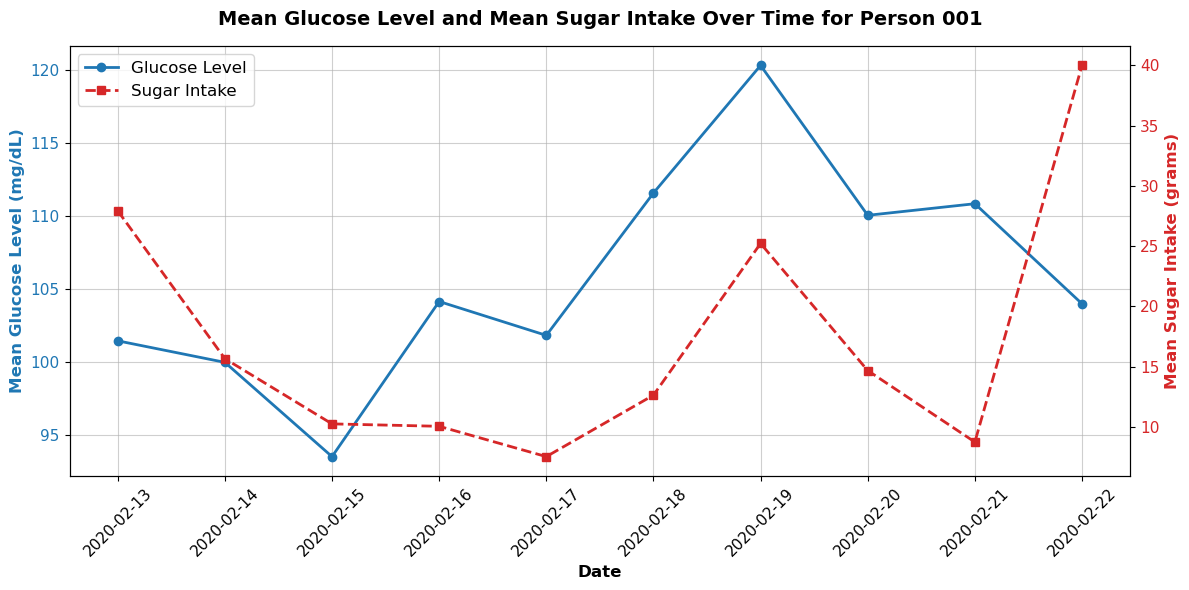

In [147]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set up the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot glucose levels
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Mean Glucose Level (mg/dL)', color='tab:blue', fontsize=12, fontweight='bold')
glucose_line, = ax1.plot(merged_df.index, merged_df['Glucose Value (mg/dL)'], 
                         marker='o', color='tab:blue', markersize=6, linewidth=2, label='Glucose Level')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=11)
ax1.grid(visible=True, linestyle='-', alpha=0.6)

# Format x-axis for better readability
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45, fontsize=11)

# Create a second y-axis for sugar intake
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Sugar Intake (grams)', color='tab:red', fontsize=12, fontweight='bold')
sugar_line, = ax2.plot(merged_df.index, merged_df['sugar'], 
                        marker='s', color='tab:red', markersize=6, linestyle='dashed', linewidth=2, label='Sugar Intake')
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=11)

# Improve spacing & title
plt.title('Mean Glucose Level and Mean Sugar Intake Over Time for Person 001', fontsize=14, fontweight='bold', pad=15)
fig.tight_layout()

# **Create a combined legend**
lines = [glucose_line, sugar_line]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left', fontsize=12)

# Show plot
plt.show()


## Visualization 1: Deceptive

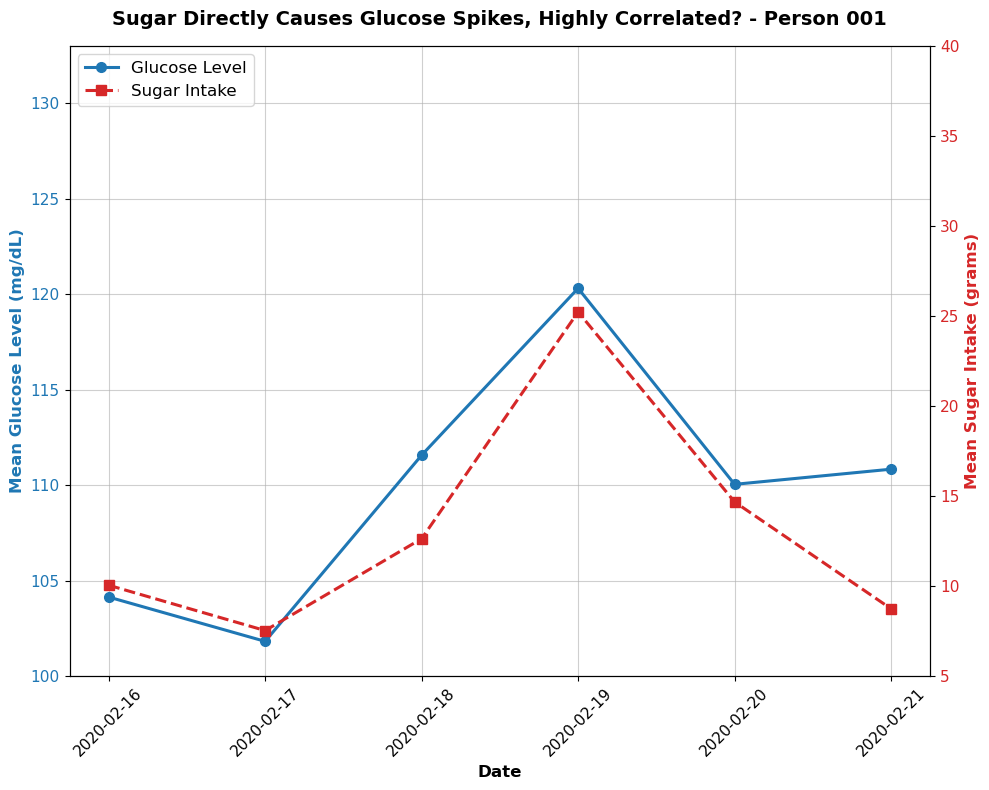

In [148]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter dataset to only include desired date range (cherry-picked for deception)
filtered_df = merged_df.loc['2020-02-16':'2020-02-21']

# Set up figure
fig, ax1 = plt.subplots(figsize=(10, 8))

# Plot glucose levels
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Mean Glucose Level (mg/dL)', color='tab:blue', fontsize=12, fontweight='bold')
glucose_line, = ax1.plot(filtered_df.index, filtered_df['Glucose Value (mg/dL)'], 
                         marker='o', color='tab:blue', markersize=7, linewidth=2.2, label='Glucose Level')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=11)
ax1.grid(visible=True, linestyle='-', alpha=0.6)

# Format x-axis for better readability
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45, fontsize=11)

# **Deceptive Y-Axis Scaling** (exaggerates glucose fluctuations)
ax1.set_ylim(100, 133)  

# Create a second y-axis for sugar intake
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Sugar Intake (grams)', color='tab:red', fontsize=12, fontweight='bold')
sugar_line, = ax2.plot(filtered_df.index, filtered_df['sugar'], 
                        marker='s', color='tab:red', markersize=7, linestyle='dashed', linewidth=2.2, label='Sugar Intake')
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=11)

# **Deceptively scale sugar intake to force peaks to align**
ax2.set_ylim(5, 40)  

# **Misleading Title** to push the false correlation narrative
plt.title('Sugar Directly Causes Glucose Spikes, Highly Correlated? - Person 001', fontsize=14, fontweight='bold', pad=15)

# **Add a combined legend to maintain deception**
lines = [glucose_line, sugar_line]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left', fontsize=12)

fig.tight_layout()
plt.show()


----

In [150]:
dexcom_001 = pd.read_csv('/Users/adrianapsay/dsc106/project2/Dexcom_001.csv')
dexcom_001.rename(columns={'Timestamp (YYYY-MM-DDThh:mm:ss)':'Date and Time'}, inplace=True)
dexcom_001 = dexcom_001[12:].reset_index()
dexcom_001.drop(columns=['index', 'Index'], inplace=True)
dexcom_001['Date'] = dexcom_001['Date and Time'].apply(lambda x: x.split(' ')[0])
dexcom_001['Time'] = dexcom_001['Date and Time'].apply(lambda x: x.split(' ')[1])
dexcom_001['Date'] = pd.to_datetime(dexcom_001['Date'])
dexcom_001['Time'] = pd.to_datetime(dexcom_001['Time'], format='%H:%M:%S').dt.time
dexcom_001.to_csv('/Users/adrianapsay/dsc106/project2/Dexcom_001cleaned.csv')

In [151]:
foodlog_001 = pd.read_csv('/Users/adrianapsay/dsc106/project2/Food_Log_001.csv')
foodlog_001['date'] = pd.to_datetime(foodlog_001['date'])
foodlog_001['time'] = pd.to_datetime(foodlog_001['time'], format='%H:%M:%S').dt.time
foodlog_001.rename(columns={'date': 'Date', 'time': 'Time'}, inplace=True)
foodlog_001

,Date,Time,time_begin,time_end,logged_food,amount,unit,searched_food,calorie,total_carb,dietary_fiber,sugar,protein,total_fat
0,2020-02-13,18:00:00,2020-02-13 18:00:00,NaN,Berry Smoothie,20.00,fluid ounce,Strawberry Smoothie,456.0,85.0,1.7,83.0,16.0,3.3
1,2020-02-13,20:30:00,2020-02-13 20:30:00,NaN,Chicken Leg,1.00,NaN,chicken leg,475.0,0.0,0.0,0.0,62.0,23.0
2,2020-02-13,20:30:00,2020-02-13 20:30:00,NaN,Asparagus,4.00,NaN,Asparagus,13.0,2.5,1.2,0.8,1.4,0.1
3,2020-02-14,07:10:00,2020-02-14 07:10:00,NaN,Natrel Lactose Free 2 Percent,8.00,fluid ounce,(Natrel) Lactose Free 2% Partly Skimmed Milk,120.0,9.0,NaN,8.0,12.0,NaN
4,2020-02-14,07:10:00,2020-02-14 07:10:00,NaN,Standard Breakfast,0.75,cup,"(Kellogg's) Frosted Flakes, Cereal",110.0,26.0,NaN,10.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-02-21,12:30:00,2020-02-21 12:30:00,NaN,Chicken Salad,0.50,cup,Chicken Salad,254.0,3.3,NaN,2.4,19.0,NaN
57,2020-02-21,12:30:00,2020-02-21 12:30:00,NaN,Pita Bread,7.00,NaN,Small Pita Bread,539.0,109.0,NaN,2.5,18.0,NaN
58,2020-02-21,19:50:00,2020-02-21 19:50:00,NaN,Cheese Pita,5.00,NaN,Generic - Serbian Cheese Pita,640.0,95.0,NaN,0.0,30.0,NaN
59,2020-02-21,20:00:00,2020-02-21 20:00:00,NaN,Spinach Smoothie,20.00,fluid ounce,Spinach Smoothie,308.0,69.0,NaN,38.0,7.2,NaN


In [152]:
foodlog_001.columns

Index(['Date', 'Time', 'time_begin', 'time_end', 'logged_food', 'amount',
       'unit', 'searched_food', 'calorie', 'total_carb', 'dietary_fiber',
       'sugar', 'protein', 'total_fat'],
      dtype='object')

In [153]:
# Merge Dexcom and Food Log data
merged_df = pd.merge(dexcom_001, foodlog_001, on=['Date', 'Time'], how='outer')

# Sort by Date and Time to maintain chronological order
merged_df.sort_values(by=['Date', 'Time'], inplace=True)

# Forward-fill the food log data (fill missing food values for in-between glucose readings)
merged_df[['calorie', 'total_carb', 'sugar']] = merged_df[['calorie', 'total_carb', 'sugar']].ffill()


In [154]:
merged_df

,Date and Time,Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),...,logged_food,amount,unit,searched_food,calorie,total_carb,dietary_fiber,sugar,protein,total_fat
0,2020-02-13 17:23:32,EGV,NaN,NaN,NaN,iPhone G6,61.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-13 17:28:32,EGV,NaN,NaN,NaN,iPhone G6,59.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-13 17:33:32,EGV,NaN,NaN,NaN,iPhone G6,58.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-13 17:38:32,EGV,NaN,NaN,NaN,iPhone G6,59.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-13 17:43:31,EGV,NaN,NaN,NaN,iPhone G6,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,2020-02-22 17:33:23,EGV,NaN,NaN,NaN,iPhone G6,139.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,654.0,82.0,NaN,40.0,NaN,NaN
2557,2020-02-22 17:38:23,EGV,NaN,NaN,NaN,iPhone G6,141.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,654.0,82.0,NaN,40.0,NaN,NaN
2558,2020-02-22 17:43:23,EGV,NaN,NaN,NaN,iPhone G6,143.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,654.0,82.0,NaN,40.0,NaN,NaN
2559,2020-02-22 17:48:22,EGV,NaN,NaN,NaN,iPhone G6,139.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,654.0,82.0,NaN,40.0,NaN,NaN


In [155]:
# Calculate percent change for glucose levels and sugar intake
merged_df['Glucose Percent Change'] = merged_df['Glucose Value (mg/dL)'].pct_change() * 100
merged_df['Sugar Percent Change'] = merged_df['sugar'].pct_change() * 100

# Fill NaN values caused by percent change calculations
merged_df.fillna(0, inplace=True)


In [156]:
# Convert Time to hours for the Y-axis
merged_df['Time in Hours'] = merged_df['Time'].apply(lambda t: t.hour + t.minute / 60.0)


In [157]:
merged_df

,Date and Time,Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),...,searched_food,calorie,total_carb,dietary_fiber,sugar,protein,total_fat,Glucose Percent Change,Sugar Percent Change,Time in Hours
0,2020-02-13 17:23:32,EGV,0,0,0,iPhone G6,61.0,0.0,0.0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,17.383333
1,2020-02-13 17:28:32,EGV,0,0,0,iPhone G6,59.0,0.0,0.0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-3.278689,0.0,17.466667
2,2020-02-13 17:33:32,EGV,0,0,0,iPhone G6,58.0,0.0,0.0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.694915,0.0,17.550000
3,2020-02-13 17:38:32,EGV,0,0,0,iPhone G6,59.0,0.0,0.0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.724138,0.0,17.633333
4,2020-02-13 17:43:31,EGV,0,0,0,iPhone G6,63.0,0.0,0.0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,6.779661,0.0,17.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,2020-02-22 17:33:23,EGV,0,0,0,iPhone G6,139.0,0.0,0.0,0,...,0,654.0,82.0,0.0,40.0,0.0,0.0,1.459854,0.0,17.550000
2557,2020-02-22 17:38:23,EGV,0,0,0,iPhone G6,141.0,0.0,0.0,0,...,0,654.0,82.0,0.0,40.0,0.0,0.0,1.438849,0.0,17.633333
2558,2020-02-22 17:43:23,EGV,0,0,0,iPhone G6,143.0,0.0,0.0,0,...,0,654.0,82.0,0.0,40.0,0.0,0.0,1.418440,0.0,17.716667
2559,2020-02-22 17:48:22,EGV,0,0,0,iPhone G6,139.0,0.0,0.0,0,...,0,654.0,82.0,0.0,40.0,0.0,0.0,-2.797203,0.0,17.800000


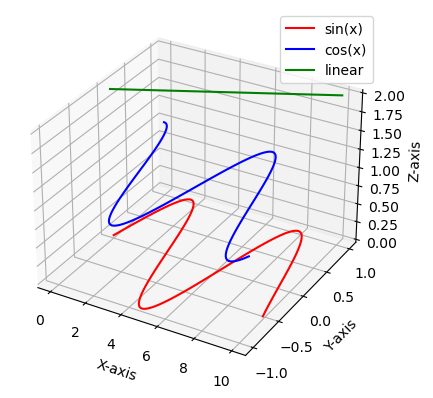

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Data for multiple 2D plots
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x / 10  # Just a linear function for variation

# Plot each 2D plot at different Z levels
ax.plot(x, y1, zs=0, zdir='z', label='sin(x)', color='r')  # Z = 0 plane
ax.plot(x, y2, zs=1, zdir='z', label='cos(x)', color='b')  # Z = 1 plane
ax.plot(x, y3, zs=2, zdir='z', label='linear', color='g')  # Z = 2 plane

# Set labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()

plt.show()


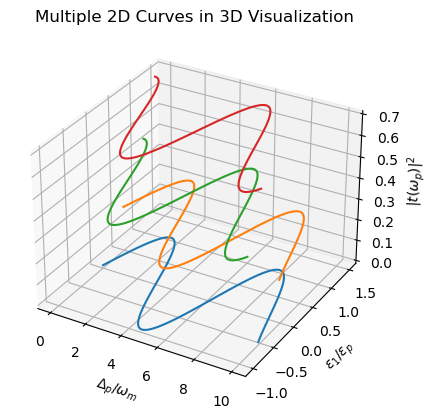

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data generation
x = np.linspace(0, 10, 100)
curves = [
    (np.sin(x), 0),               # Curve at Z=0
    (np.sin(x) + 0.5, 0.2),       # Curve at Z=0.2
    (np.cos(x), 0.45),            # Curve at Z=0.45
    (np.cos(x) + 0.3, 0.7)        # Curve at Z=0.7
]

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each curve
for curve, z_pos in curves:
    ax.plot(x, curve, zs=z_pos, zdir='z', label=f'Curve at z={z_pos}')

# Customize the axes
ax.set_xlabel(r'$\Delta_p / \omega_m$')
ax.set_ylabel(r'$\varepsilon_1 / \varepsilon_p$')
ax.set_zlabel(r'$|t(\omega_p)|^2$')
ax.set_title('Multiple 2D Curves in 3D Visualization')

# Optional: Grid and legend
ax.grid(True)

plt.show()


In [160]:
dexcom_001.columns

Index(['Date and Time', 'Event Type', 'Event Subtype', 'Patient Info',
       'Device Info', 'Source Device ID', 'Glucose Value (mg/dL)',
       'Insulin Value (u)', 'Carb Value (grams)', 'Duration (hh:mm:ss)',
       'Glucose Rate of Change (mg/dL/min)', 'Transmitter Time (Long Integer)',
       'Date', 'Time'],
      dtype='object')

/var/folders/25/kkk3f6t17wgccfwtp18f1j5h0000gn/T/ipykernel_47123/3729833697.py:47: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



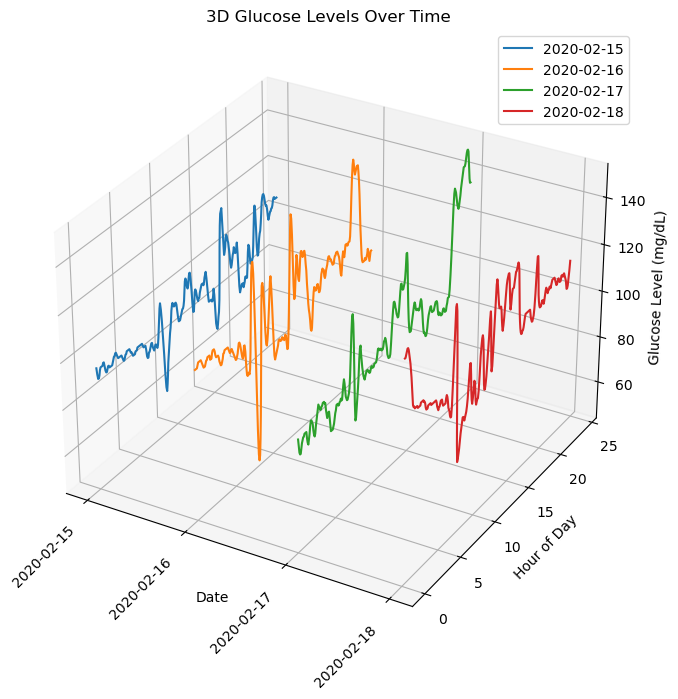

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assume dexcom_001 is already loaded

# Step 1: Convert "Date and Time" to datetime and extract relevant info
dexcom_001['Datetime'] = pd.to_datetime(dexcom_001['Date and Time'])
dexcom_001['Date'] = dexcom_001['Datetime'].dt.date
dexcom_001['Hour'] = dexcom_001['Datetime'].dt.hour + dexcom_001['Datetime'].dt.minute / 60.0
dexcom_001['Glucose'] = dexcom_001['Glucose Value (mg/dL)']

# Step 2: Filter out any rows with missing glucose values
dexcom_001 = dexcom_001.dropna(subset=['Glucose'])

# Step 3: Get unique dates for separate curves
unique_dates = dexcom_001['Date'].unique()[2:6]

# Step 4: Plot each curve in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i, date in enumerate(unique_dates):
    # Filter data for the current date
    date_data = dexcom_001[dexcom_001['Date'] == date]
    
    # X-axis: Unique index for each date
    x_vals = [i] * len(date_data)
    # Y-axis: Hour of the day
    y_vals = date_data['Hour']
    # Z-axis: Glucose levels
    z_vals = date_data['Glucose']
    
    # Plot the curve for this date
    ax.plot(x_vals, y_vals, z_vals, label=str(date))

# Step 5: Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Hour of Day')
ax.set_zlabel('Glucose Level (mg/dL)')
ax.set_xticks(range(len(unique_dates)))
ax.set_xticklabels(unique_dates, rotation=45, ha='right')

# Add a legend and display the plot
ax.legend()
plt.title('3D Glucose Levels Over Time')
plt.tight_layout()
plt.show()


/var/folders/25/kkk3f6t17wgccfwtp18f1j5h0000gn/T/ipykernel_47123/3687394293.py:50: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



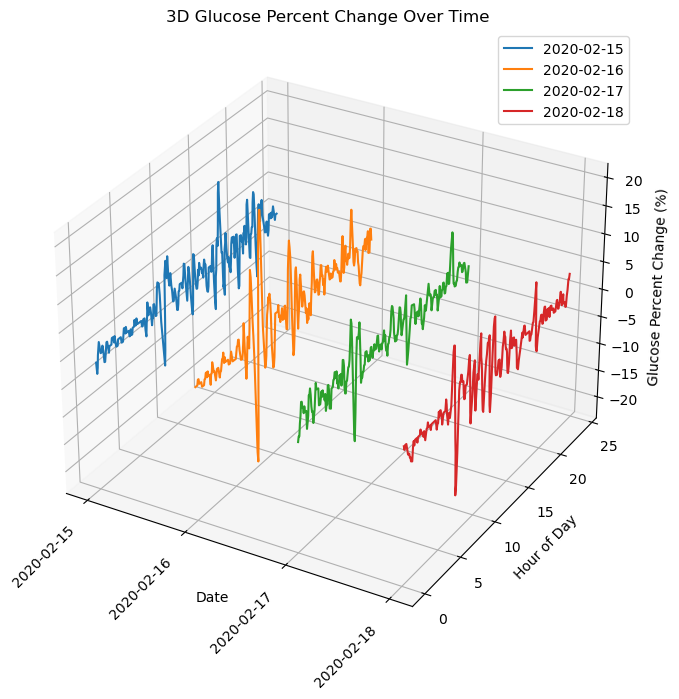

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assume dexcom_001 is already loaded

# Step 1: Convert "Date and Time" to datetime and extract relevant info
dexcom_001['Datetime'] = pd.to_datetime(dexcom_001['Date and Time'])
dexcom_001['Date'] = dexcom_001['Datetime'].dt.date
dexcom_001['Hour'] = dexcom_001['Datetime'].dt.hour + dexcom_001['Datetime'].dt.minute / 60.0

# Step 2: Calculate the percent change in glucose levels
dexcom_001['Glucose'] = dexcom_001['Glucose Value (mg/dL)']
dexcom_001['Glucose_Percent_Change'] = dexcom_001['Glucose'].pct_change() * 100

# Step 3: Filter out any rows with missing percent change values
dexcom_001 = dexcom_001.dropna(subset=['Glucose_Percent_Change'])

# Step 4: Get unique dates for separate curves
unique_dates = dexcom_001['Date'].unique()[2:6]

# Step 5: Plot each curve in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i, date in enumerate(unique_dates):
    # Filter data for the current date
    date_data = dexcom_001[dexcom_001['Date'] == date]
    
    # X-axis: Unique index for each date
    x_vals = [i] * len(date_data)
    # Y-axis: Hour of the day
    y_vals = date_data['Hour']
    # Z-axis: Glucose percent change values
    z_vals = date_data['Glucose_Percent_Change']
    
    # Plot the curve for this date
    ax.plot(x_vals, y_vals, z_vals, label=str(date))

# Step 6: Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Hour of Day')
ax.set_zlabel('Glucose Percent Change (%)')
ax.set_xticks(range(len(unique_dates)))
ax.set_xticklabels(unique_dates, rotation=45, ha='right')

# Add a legend and display the plot
ax.legend()
plt.title('3D Glucose Percent Change Over Time')
plt.tight_layout()
plt.show()


In [163]:
foodlog_001['Time']

0     18:00:00
1     20:30:00
2     20:30:00
3     07:10:00
4     07:10:00
        ...   
56    12:30:00
57    12:30:00
58    19:50:00
59    20:00:00
60    15:10:00
Name: Time, Length: 61, dtype: object

In [164]:
from datetime import datetime
# Assume dexcom_001 and foodlog_001 are already loaded

# Step 1: Convert "Date and Time" to datetime in dexcom_001
dexcom_001['Datetime'] = pd.to_datetime(dexcom_001['Date and Time'])
dexcom_001['Date'] = dexcom_001['Datetime'].dt.date
dexcom_001['Hour'] = dexcom_001['Datetime'].dt.hour + dexcom_001['Datetime'].dt.minute / 60.0

# Convert "Date" and "Time" in foodlog_001 to datetime
foodlog_001['Datetime'] = foodlog_001.apply(lambda row: datetime.combine(row['Date'], row['Time']), axis=1)
foodlog_001['Date'] = foodlog_001['Datetime'].dt.date
foodlog_001['Hour'] = foodlog_001['Datetime'].dt.hour + foodlog_001['Datetime'].dt.minute / 60.0

# Step 2: Calculate the percent change in glucose levels
dexcom_001['Glucose'] = dexcom_001['Glucose Value (mg/dL)']
dexcom_001['Glucose_Percent_Change'] = dexcom_001['Glucose'].pct_change() * 100

# Step 3: Filter out any rows with missing percent change values
dexcom_001 = dexcom_001.dropna(subset=['Glucose_Percent_Change'])

# Step 4: Get unique dates for separate curves
unique_dates = dexcom_001['Date'].unique()[1:4]

/var/folders/25/kkk3f6t17wgccfwtp18f1j5h0000gn/T/ipykernel_47123/3584419624.py:77: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



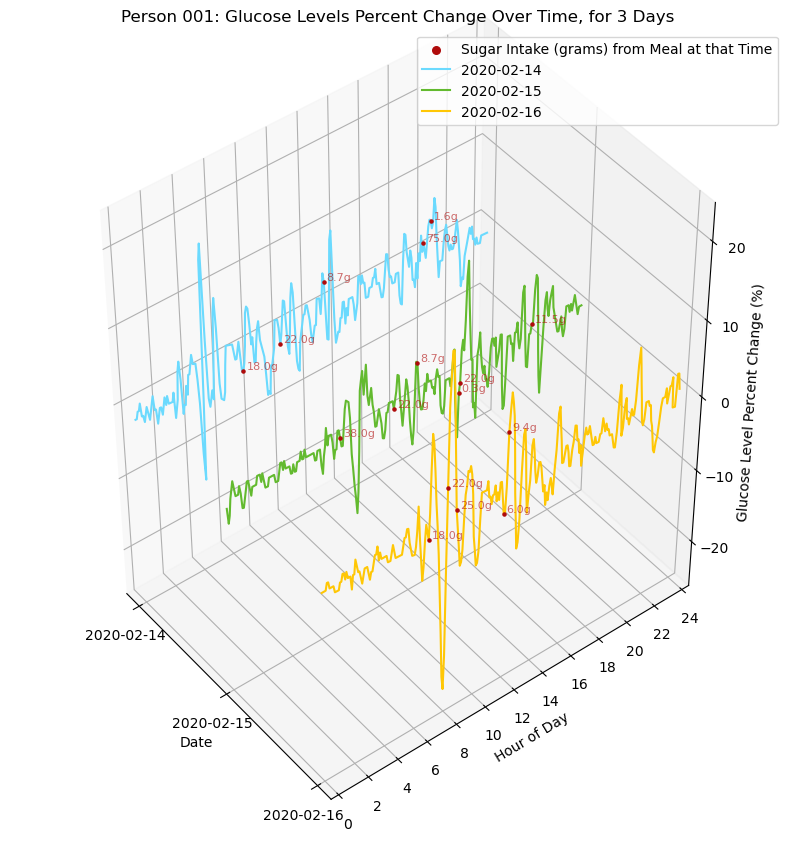

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime


# Step 5: Plot each curve in 3D
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors (you can add more colors as needed)
date_colors = ['#6bdafe', '#63ba2f', '#ffc705']  # Example colors

ax.scatter([], [], color='#af0b0b', marker='o', s=30, label='Sugar Intake (grams) from Meal at that Time')


for i, date in enumerate(unique_dates):
    # Filter data for the current date
    date_data = dexcom_001[dexcom_001['Date'] == date]
    
    # Select the color for this date
    curve_color = date_colors[i % len(date_colors)]
    
    # X-axis: Unique index for each date
    x_vals = [i] * len(date_data)
    # Y-axis: Hour of the day
    y_vals = date_data['Hour']
    # Z-axis: Glucose percent change values
    z_vals = date_data['Glucose_Percent_Change']
    
    # Plot the curve for this date with the assigned color
    ax.plot(x_vals, y_vals, z_vals, label=str(date), color=curve_color)

    # Step 6: Annotate with foodlog data for the current date
    food_data = foodlog_001[foodlog_001['Date'] == date]

    # Group by hour and sum the sugar values
    grouped_sugar = food_data.groupby('Hour')['sugar'].sum()

    for j, (hour, total_sugar) in enumerate(grouped_sugar.items()):
        # Find the closest glucose point to the food time
        closest_point = date_data.iloc[(date_data['Hour'] - hour).abs().argmin()]

        # Annotate the graph near the closest point with total sugar information
        if total_sugar > 0:
            if total_sugar != 9.3:
                annotation_text = f"{total_sugar:.1f}g"
                # print(annotation_text)
                ax.text(i, closest_point['Hour'] + 0.2, closest_point['Glucose_Percent_Change'],
                        annotation_text, color='#af0b0b', fontsize=8, alpha=0.6)  # Use the same color for annotation
                
                # Add a marker at the annotated point
                ax.scatter(i, closest_point['Hour'], closest_point['Glucose_Percent_Change'],
                        color='#af0b0b', marker='o', s=5)


# Step 7: Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Hour of Day')
ax.set_zlabel('Glucose Level Percent Change (%)')
ax.set_xticks(range(len(unique_dates)))
ax.set_xticklabels(unique_dates)
ax.xaxis.label.set_rotation(0)

# Widen the Y-axis range to cover all hours
ax.set_ylim(0, 24)
ax.set_box_aspect([1.5, 2, 2.3])


# Optionally, set custom Y-axis ticks for better readability
ax.set_yticks(range(0, 25, 2))
ax.view_init(elev=45, azim=-38)

# Add a legend and display the plot
ax.legend()
plt.title('Person 001: Glucose Levels Percent Change Over Time, for 3 Days')
plt.tight_layout()
plt.show()


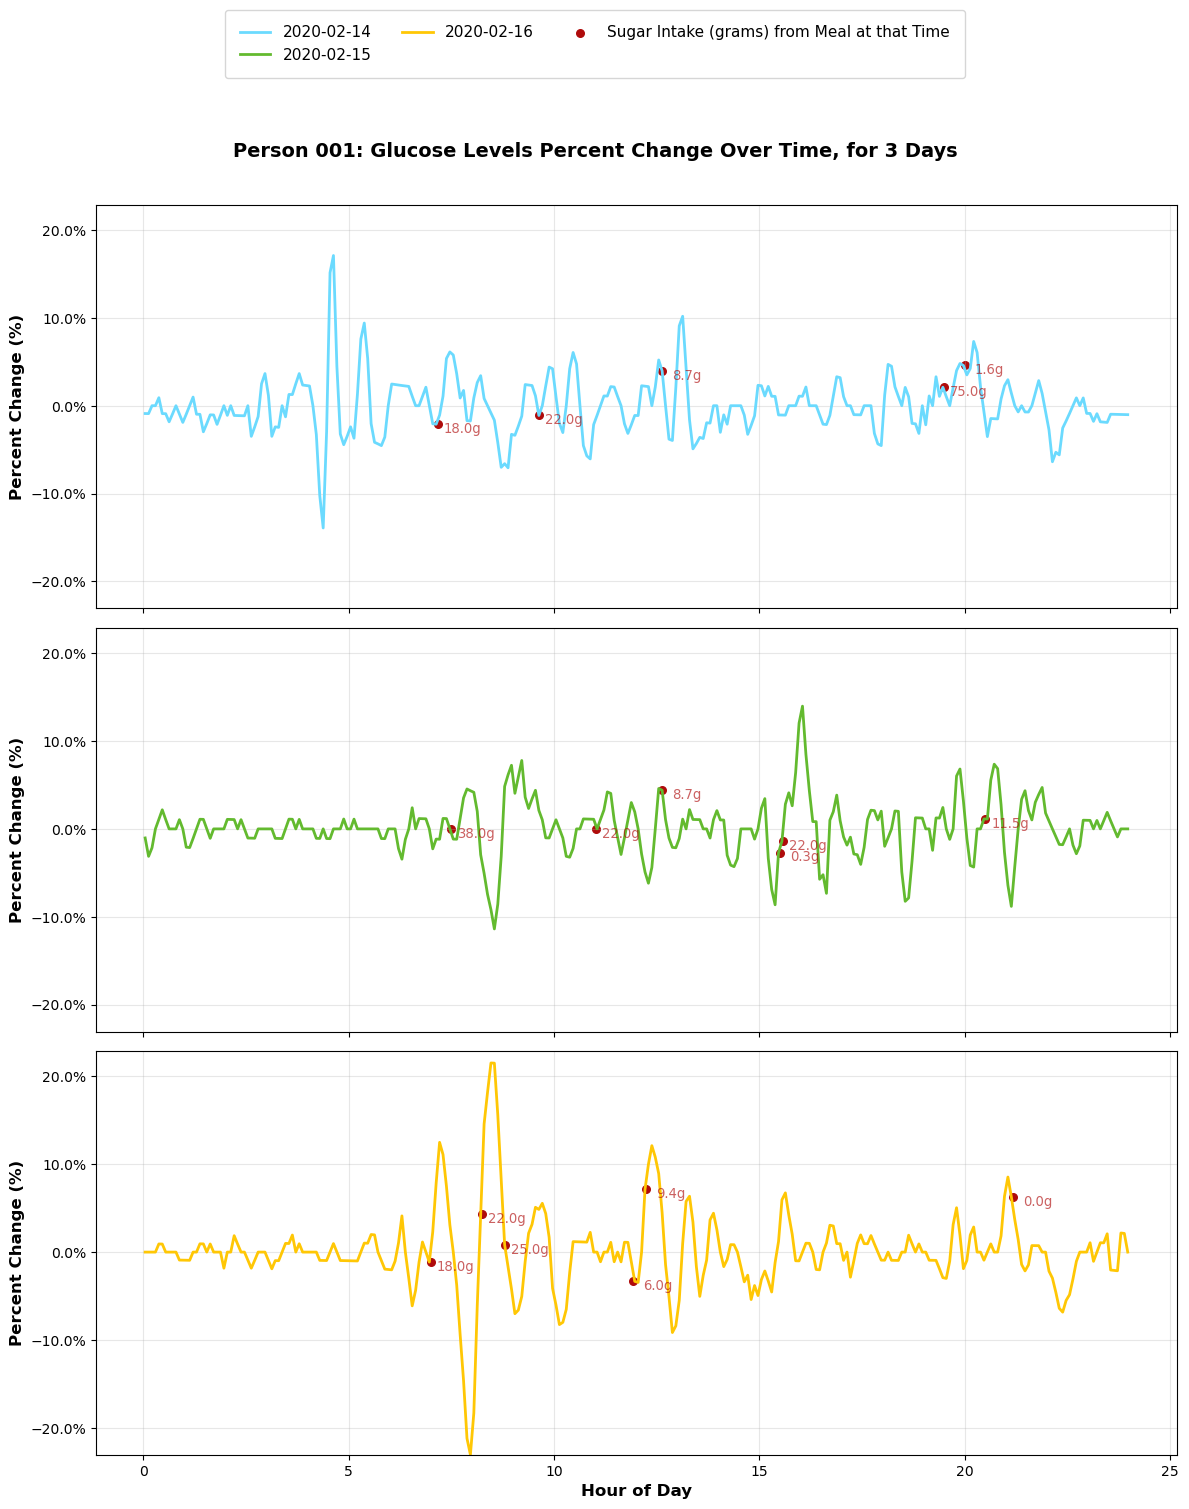

In [166]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Find the min and max values across all dates to set a consistent Y-axis range
y_min = dexcom_001['Glucose_Percent_Change'].min()
y_max = dexcom_001['Glucose_Percent_Change'].max()

# Plot with shared Y-axis limits
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 14), sharex=True)

# Offset for text labels to reduce overlap
label_offset_vert = -0.5
label_offset_horiz = 0.6

# Keep a reference for one scatter plot handle to use in the legend
sugar_scatter_handle = None


for i, (ax, date) in enumerate(zip(axes, unique_dates)):
    date_data = dexcom_001[dexcom_001['Date'] == date]

    # Plot the glucose percent change curve
    ax.plot(date_data['Hour'], date_data['Glucose_Percent_Change'], label=date, color=date_colors[i], linewidth=2)

    # Annotate sugar intake
    food_data = foodlog_001[foodlog_001['Date'] == date]
    grouped_sugar = food_data.groupby('Hour')['sugar'].sum()

    for hour, total_sugar in grouped_sugar.items():
        closest_point = date_data.iloc[(date_data['Hour'] - hour).abs().argmin()]
        ax.text(hour + label_offset_horiz, closest_point['Glucose_Percent_Change'] + label_offset_vert, 
                f"{total_sugar:.1f}g", color='#af0b0b', fontsize=9.5, ha='center', va='center', alpha=0.65),
        scatter = ax.scatter(hour, closest_point['Glucose_Percent_Change'], color='#af0b0b', marker='o', s=30)
        if sugar_scatter_handle is None:
            sugar_scatter_handle = scatter  # Store the first scatter plot handle

    # Set axis labels and styles
    ax.set_ylabel('Percent Change (%)', fontsize=12, fontweight='bold')
    ax.set_ylim(y_min, y_max)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter())
    ax.grid(True, linestyle='-', alpha=0.3)

# Collect handles and labels from all axes
handles, labels = [], []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# Add the stored scatter plot handle for sugar intake to the legend
handles.append(sugar_scatter_handle)
labels.append('Sugar Intake (grams) from Meal at that Time')

# Add the global legend
fig.legend(handles, labels, loc='upper center', ncol=3, fontsize=11, frameon=True, bbox_to_anchor=(0.5, 1.08), borderpad=1)

# Final plot adjustments
axes[-1].set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
plt.suptitle('Person 001: Glucose Levels Percent Change Over Time, for 3 Days', fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [168]:
import plotly.graph_objects as go
import pandas as pd

y_min = dexcom_001['Glucose_Percent_Change'].min()
y_max = dexcom_001['Glucose_Percent_Change'].max()

unique_dates = dexcom_001['Date'].unique()

fig = go.Figure()

label_offset_vert = -0.5
label_offset_horiz = 0.6

unique_dates = dexcom_001['Date'].unique()[3:4]

date_colors = ['green']

for i, date in enumerate(unique_dates):
    date_data = dexcom_001[dexcom_001['Date'] == date]

    fig.add_trace(go.Scatter(
        x=date_data['Hour'],
        y=date_data['Glucose_Percent_Change'],
        mode='lines',
        line=dict(color=date_colors[i], width=2),
        name=f'Glucose - {date}'
    ))
    # print(date_data['Glucose_Percent_Change'])
    food_data = foodlog_001[foodlog_001['Date'] == date]
    grouped_sugar = food_data.groupby('Hour')['sugar'].sum()

    for hour, total_sugar in grouped_sugar.items():
        closest_point = date_data.iloc[(date_data['Hour'] - hour).abs().argmin()]

        fig.add_trace(go.Scatter(
            x=[hour + label_offset_horiz],
            y=[closest_point['Glucose_Percent_Change'] + label_offset_vert],
            mode='text',
            text=[f"{total_sugar:.1f}g"],
            textfont=dict(color='#af0b0b', size=12),
            name='Sugar Annotation',
            showlegend=False
        ))

        fig.add_trace(go.Scatter(
            x=[hour],
            y=[closest_point['Glucose_Percent_Change']],
            mode='markers',
            marker=dict(color='#af0b0b', size=8),
            name='Sugar Intake'
        ))

fig.update_layout(
    title='Person 001: Glucose Levels Percent Change Over Time for a Day, 2/16/2020',
    xaxis_title='Hour of Day',
    yaxis_title='Percent Change (%)',
    yaxis=dict(range=[y_min, y_max], tickformat=".1f"),
    legend_title='Legend',
    template='plotly_white',
    height=800
)

fig.show()
